# Applied Data Science Capstone Project

In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.utils import resample
from sklearn import preprocessing
warnings.filterwarnings('ignore')

In [2]:
accident_df = pd.read_csv('Data-Collisions.csv')

In [3]:
accident_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
accident_df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
pre_accident_df = accident_df[["SEVERITYCODE","WEATHER","ROADCOND","LIGHTCOND"]]

In [6]:
# Convert object columns to category
pre_accident_df["WEATHER"] = pre_accident_df["WEATHER"].astype('category')
pre_accident_df["ROADCOND"] = pre_accident_df["ROADCOND"].astype('category')
pre_accident_df["LIGHTCOND"] = pre_accident_df["LIGHTCOND"].astype('category')

In [7]:
# Create new column for analysis
pre_accident_df["WEATHER_CAT"] = pre_accident_df["WEATHER"].cat.codes
pre_accident_df["ROADCOND_CAT"] = pre_accident_df["ROADCOND"].cat.codes
pre_accident_df["LIGHTCOND_CAT"] = pre_accident_df["LIGHTCOND"].cat.codes

In [8]:
pre_accident_df.dtypes

SEVERITYCODE        int64
WEATHER          category
ROADCOND         category
LIGHTCOND        category
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
dtype: object

In [9]:
pre_accident_df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [10]:
pre_accident_df["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [11]:
pre_accident_df["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [12]:
pre_accident_df["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [13]:
pre_accident_df_maj = pre_accident_df[pre_accident_df.SEVERITYCODE == 1]
pre_accident_df_min = pre_accident_df[pre_accident_df.SEVERITYCODE == 2]

pre_accident_df_maj_dsample = resample(pre_accident_df_maj,
                              replace=False,
                              n_samples=58188,
                              random_state=123)

balanced_accident_df = pd.concat([pre_accident_df_maj_dsample, pre_accident_df_min])

balanced_accident_df.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [14]:
X = np.asarray(balanced_accident_df[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT']])
X[0:5]

array([[ 6,  8,  2],
       [ 1,  0,  5],
       [10,  7,  8],
       [ 1,  0,  5],
       [ 1,  0,  5]], dtype=int8)

In [15]:
y = np.asarray(balanced_accident_df['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1])

In [16]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15236718,  1.52797946, -1.21648407],
       [-0.67488   , -0.67084969,  0.42978835],
       [ 2.61416492,  1.25312582,  2.07606076],
       [-0.67488   , -0.67084969,  0.42978835],
       [-0.67488   , -0.67084969,  0.42978835]])

## Training and Test Data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('No. of training set rows:', X_train.shape[0])
print ('No. of test set rows:', X_test.shape[0])

No. of training set rows: 81463
No. of test set rows: 34913


## Model Training

In [18]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### K Nearest Neighbours (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [20]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i + 1, mean_accuracy[i]))

k = 1 has a Score = 0.5180018904133131 
k = 2 has a Score = 0.5118437258327844 
k = 3 has a Score = 0.554148884369719 
k = 4 has a Score = 0.5114427290694011 
k = 5 has a Score = 0.5504253429954459 
k = 6 has a Score = 0.5557815140492081 
k = 7 has a Score = 0.5515710480336837 
k = 8 has a Score = 0.5604502620800275 
k = 9 has a Score = 0.5551800189041332 


Text(0, 0.5, 'Testing Accuracy Values')

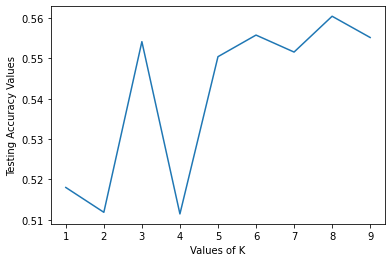

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [22]:
# As per above observation, best accuracy got at 8.
k = 8
knn_model = knn(n_neighbors = k)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)
knn_yhat[0:5]

array([2, 2, 1, 1, 2])

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

depth_range = range(1, 10)
jaccard_similarity_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_similarity_score_.append(jaccard_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

In [24]:
result = pd.DataFrame([jaccard_similarity_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.102573,0.120534,0.156570,0.156570,0.280563,0.28289,0.287917,0.277237,0.277052
F1,0.436513,0.451957,0.478074,0.478074,0.541223,0.54258,0.545345,0.541370,0.541281


In [25]:
# As per above observation, best matrics got at depth 7.
d = 7
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
dt.fit(X_train, y_train)
dt_yhat = dt.predict(X_test)
dt_yhat[0:5]

array([2, 2, 1, 1, 2])

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression 

solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
index = []
accuracy_score_ = []
iterations = 0

for index1, c in enumerate(regularization_val):
    for index2, solver in enumerate(solvers):
        index.append(index1 + index2 *5)
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print('Test {}: Accuracy at C = {} when Solver = {} is : {}'.format(iterations, c, solver, log_loss(y_test, y_prob) ))
        accuracy_score_.append(log_loss(y_test, y_prob))

Test 1: Accuracy at C = 0.1 when Solver = lbfgs is : 0.6849527301213273
Test 2: Accuracy at C = 0.1 when Solver = saga is : 0.6849527653823533
Test 3: Accuracy at C = 0.1 when Solver = liblinear is : 0.6849527301963406
Test 4: Accuracy at C = 0.1 when Solver = newton-cg is : 0.6849527389505141
Test 5: Accuracy at C = 0.1 when Solver = sag is : 0.6849526818635421
Test 6: Accuracy at C = 0.01 when Solver = lbfgs is : 0.6849475798442786
Test 7: Accuracy at C = 0.01 when Solver = saga is : 0.6849475700139274
Test 8: Accuracy at C = 0.01 when Solver = liblinear is : 0.6849475402881953
Test 9: Accuracy at C = 0.01 when Solver = newton-cg is : 0.6849475875603592
Test 10: Accuracy at C = 0.01 when Solver = sag is : 0.6849474875308312
Test 11: Accuracy at C = 0.001 when Solver = lbfgs is : 0.685039748719025
Test 12: Accuracy at C = 0.001 when Solver = saga is : 0.6850397444204183
Test 13: Accuracy at C = 0.001 when Solver = liblinear is : 0.6850394337299878
Test 14: Accuracy at C = 0.001 when S

Text(0, 0.5, 'Testing Accuracy')

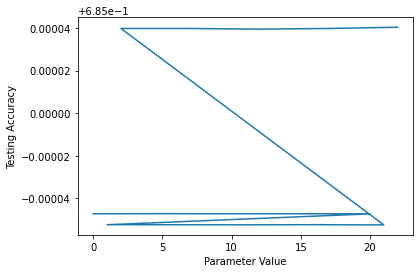

In [27]:
lr_prob = lr_model.predict_proba(X_test)
log_loss(y_test, lr_prob)
plt.plot(index, accuracy_score_)
plt.xlabel('Parameter Value')
plt.ylabel('Testing Accuracy')

In [28]:
# As per above observation, best matrics got at 0.001 with sag solver.
lr = LogisticRegression(C = 0.001, solver = 'sag')
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)
lr_yhat[0:5]

array([1, 2, 1, 1, 1])

In [29]:
lr_yprob = lr.predict_proba(X_test)

In [30]:
lr_yprob = lr.predict_proba(X_test)
lr_ll = log_loss(y_test, lr_yprob)
lr_ll

0.6850408244439914

## Model Evaluation

### KNN Evalution

In [31]:
knn_js = jaccard_score(y_test, knn_yhat)
knn_js

0.32384561156150865

In [32]:
knn_f1 = f1_score(y_test, knn_yhat, average='macro')
knn_f1

0.5517390361760366

In [33]:
knn_ac = accuracy_score(y_test, knn_yhat)
knn_ac

0.5604502620800275

### Decision Tree Evaluation

In [34]:
dt_js = jaccard_score(y_test, dt_yhat)
dt_js

0.28791725434884813

In [35]:
dt_f1 = f1_score(y_test, dt_yhat, average='macro')
dt_f1

0.5450788093962291

In [36]:
dt_ac = accuracy_score(y_test, dt_yhat)
dt_ac

0.5661787872712171

### Logistic Regression Evaluation

In [37]:
lr_js = jaccard_score(y_test, lr_yhat)
lr_js

0.27170276457122733

In [38]:
lr_f1 = f1_score(y_test, lr_yhat, average='macro')
lr_f1

0.5115910735674357

In [39]:
lr_ac = accuracy_score(y_test, lr_yhat)
lr_ac

0.5261363961848022

## Report

In [40]:
# accuracy score list
as_list = [round(knn_ac, 2), round(dt_ac, 2), round(lr_ac, 2)]
as_list

[0.56, 0.57, 0.53]

In [41]:
# jaccard score list
js_list = [round(knn_js, 2), round(dt_js, 2), round(lr_js, 2)]
js_list

[0.32, 0.29, 0.27]

In [42]:
# f1 score list
f1_list = [round(knn_f1, 2), round(dt_f1, 2), round(lr_f1, 2)]
f1_list

[0.55, 0.55, 0.51]

In [43]:
# log loss list
ll_list = ['NA','NA', round(lr_ll, 2)]
ll_list

['NA', 'NA', 0.69]

In [44]:
columns = ['KNN', 'Decision Tree', 'Logistic Regression']
index = ['Accuracy Score', 'Jaccard', 'F1-Score', 'Logloss']
accuracy_df = pd.DataFrame([as_list, js_list, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Accuracy Score,Jaccard,F1-Score,Logloss
KNN,0.56,0.32,0.55,NA
Decision Tree,0.57,0.29,0.55,NA
Logistic Regression,0.53,0.27,0.51,0.69
